In [1]:
import requests
import numpy as np
r=requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a''')
t=requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t''')

In [2]:
from sklearn.datasets import load_svmlight_file
from io import BytesIO
x_train,y_train=load_svmlight_file(f=BytesIO(r.content),n_features=123)
x_val,y_val=load_svmlight_file(f=BytesIO(t.content),n_features=123)

In [3]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_val = y_val.reshape(y_val.shape[0], 1)
print(x_train.shape)

(32561, 123)


In [4]:
n_samples,n_features=x_train.shape
losses_train=[]
losses_val=[]
batch_size=64
max_epoch=2000
learning_rate=0.01
C=0.5

In [5]:
w = np.ones((n_features,1))
print(w.shape)

(123, 1)


In [6]:
def loss(a,b):
    e=np.maximum(0,(1-a*b))
    return ((C*e.sum())+0.5*np.dot(w.transpose(),w).sum()) / b.shape[0]         


In [7]:
loss_train = loss(x_train.dot(w), y_train)
loss_val = loss(x_val.dot(w), y_val)
print(loss_train)
print(loss_val)

5.638478547956144
5.671242552668755


In [8]:
for epoch in range(max_epoch):
    
    batch_sample=np.random.choice(x_train.shape[0],batch_size)
    x=x_train[batch_sample]
    y=y_train[batch_sample]
    #print(x.shape)
    #print(y.shape)
    y[1 - y * (x .dot(w)) < 0] = 0
    G=(-1)*(x.T.dot(y))/y.shape[0]+w
    G=-G
    w+=learning_rate*G   
    #train_predict=x_train.dot(w) .T.dot(y))
    #losses_train.append(loss(train_predict,y_train)[0])
    val_predict=x_val.dot(w)
    losses_val.append(loss(val_predict,y_val))
   

Text(0.5,1,'loss')

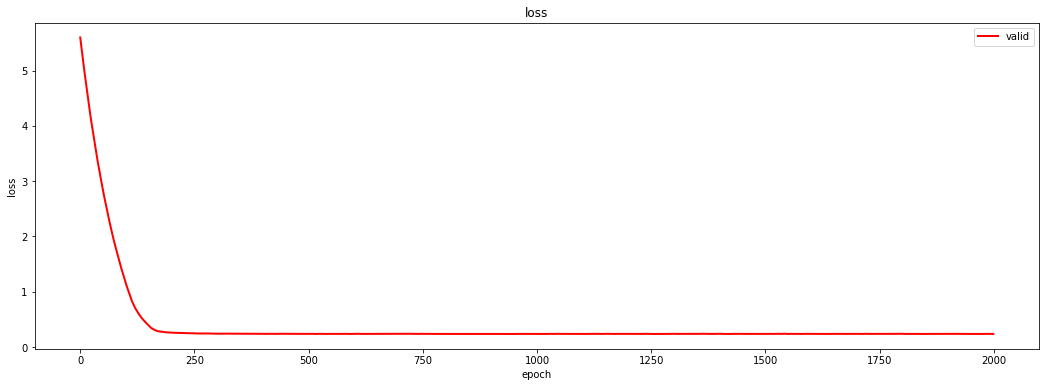

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
#plt.plot(losses_train, '--', c='b',linewidth=4, label='train')
plt.plot(losses_val, c='r', linewidth=2, label='valid')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("loss")
